In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hdbscan
import sklearn.cluster as cluster
from ema_workbench.analysis import prim
%matplotlib inline

/home1/06659/wmobley/.local/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/home1/06659/wmobley/.local/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/home1/06659/wmobley/.local/lib/python3.9/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)
/home1/06659/wmobley/.local/lib/python3.9/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarni

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(7,5)})


In [3]:
df = pd.read_csv("CodedOutputs/gray_lit_coded.csv")

In [4]:
print(len(df))

198
198


In [5]:
df = df.fillna(0)
surveyData = df[df.columns[3:]].values

In [6]:
surveyData

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])

In [7]:
import umap
reducer  = umap.UMAP(
    n_neighbors=3,
    min_dist=0.0,
    n_components=2,
    random_state=42,
)

/home1/06659/wmobley/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home1/06659/wmobley/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/work/06659/wmobley/ls6/miniconda3/envs/myenv/lib/python3.9/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/work/06659/wmobley/ls6/miniconda3/envs/myenv/lib/python3.9/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [8]:
embedding = reducer.fit_transform(surveyData)
embedding.shape


/work/06659/wmobley/ls6/miniconda3/envs/myenv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/work/06659/wmobley/ls6/miniconda3/envs/myenv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(198, 2)

(198, 2)

/home1/06659/wmobley/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home1/06659/wmobley/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


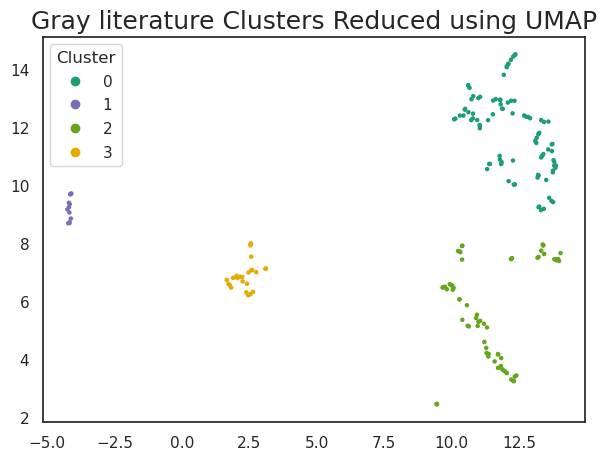

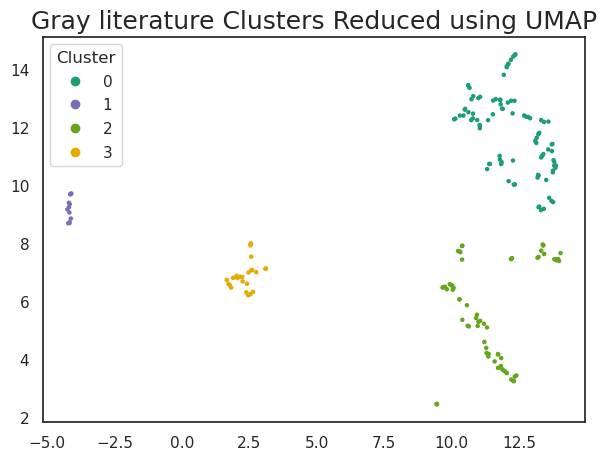

In [9]:
import matplotlib as mpl

kmeans_labels = cluster.KMeans(n_clusters=4).fit_predict(embedding)
cmap = mpl.colors.ListedColormap(["#1b9e77", "#d95f02", "#7570b3","#e7298a", "#66a61e","#e6ab02"])
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels, s=5, cmap=cmap);

plt.legend(*scatter.legend_elements(num=3),
                    loc="upper left", title="Cluster")
plt.title('Gray literature Clusters Reduced using UMAP', fontsize=18);

In [10]:
np.linspace(0,5,6)

array([0., 1., 2., 3., 4., 5.])

array([0., 1., 2., 3., 4., 5.])

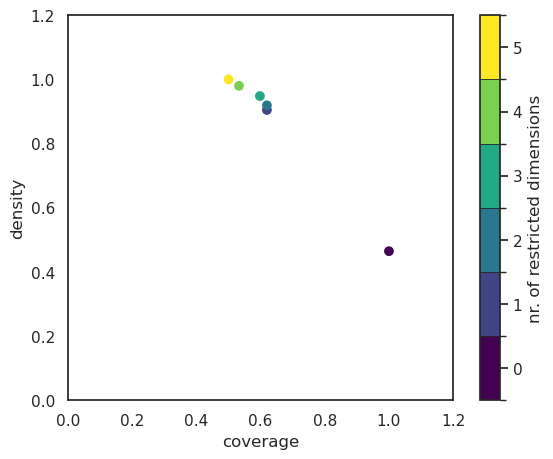

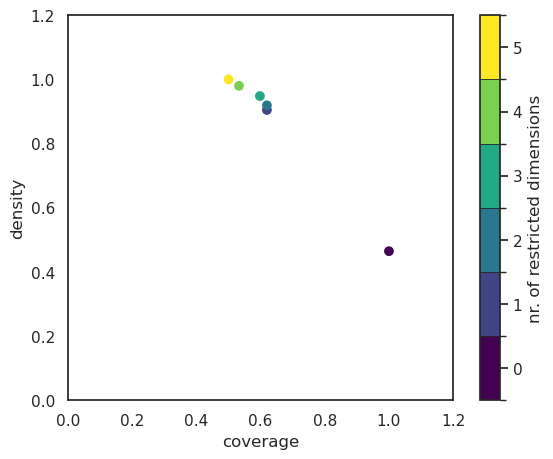

coverage    0.597826
density     0.948276
id          3.000000
mass        0.292929
mean        0.948276
res_dim     3.000000
Name: 3, dtype: float64

                        box 3                        
                          min  max  qp value qp value
Chemical                  0.5  1.0  0.000004      NaN
Potable Water Treatment   0.5  1.0  0.302058      NaN
Wastewater Treatment      1.0  1.0  0.440309      NaN

coverage    0.597826
density     0.948276
id          3.000000
mass        0.292929
mean        0.948276
res_dim     3.000000
Name: 3, dtype: float64

                        box 3                        
                          min  max  qp value qp value
Chemical                  0.5  1.0  0.000004      NaN
Potable Water Treatment   0.5  1.0  0.302058      NaN
Wastewater Treatment      1.0  1.0  0.440309      NaN



[None]

[None]

In [11]:
y = kmeans_labels==0


p = prim.Prim(df[df.columns[3:]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(3)

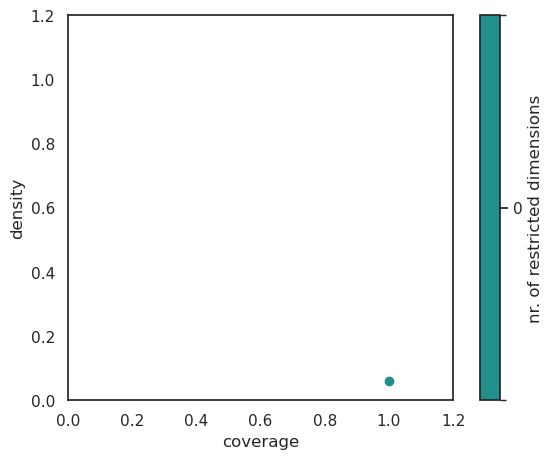

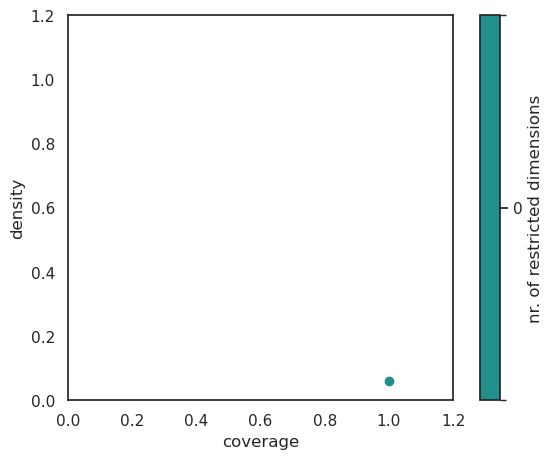

coverage    1.000000
density     0.060606
id          0.000000
mass        1.000000
mean        0.060606
res_dim     0.000000
Name: 0, dtype: float64

Empty DataFrame
Columns: [(box 0, min), (box 0, max), (box 0, qp value), (box 0, qp value)]
Index: []

coverage    1.000000
density     0.060606
id          0.000000
mass        1.000000
mean        0.060606
res_dim     0.000000
Name: 0, dtype: float64

Empty DataFrame
Columns: [(box 0, min), (box 0, max), (box 0, qp value), (box 0, qp value)]
Index: []



[None]

[None]

In [13]:
y = kmeans_labels==1


p = prim.Prim(df[df.columns[3:]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(0)

/home1/06659/wmobley/.local/lib/python3.9/site-packages/ema_workbench/analysis/prim.py:1508: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/home1/06659/wmobley/.local/lib/python3.9/site-packages/ema_workbench/analysis/prim.py:1508: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


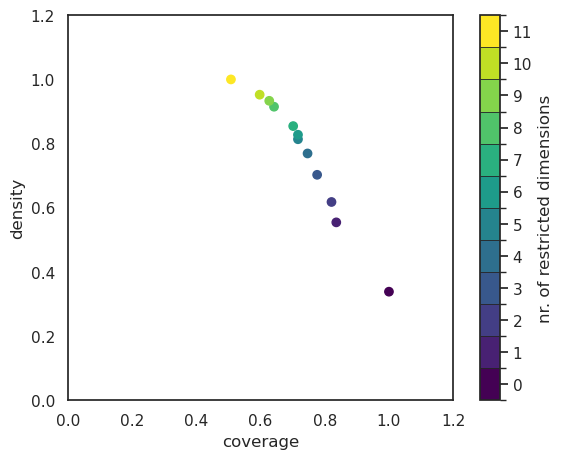

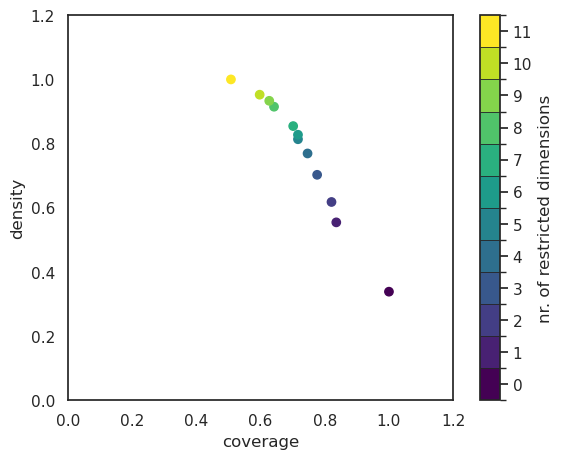

coverage    0.701493
density     0.854545
id          7.000000
mass        0.277778
mean        0.854545
res_dim     7.000000
Name: 7, dtype: float64

                         box 7                         
                           min  max  qp value  qp value
Design Considerations      0.0  0.5       NaN  0.057059
Source Water Testing       0.0  0.5       NaN  0.099118
local                      0.0  0.0       NaN  0.219671
Chemical                   0.0  0.5       NaN  0.376339
End-Users Storage System   0.0  0.0       NaN  0.467075
Administrative Processes   0.5  1.0  0.202453       NaN
Technical Considerations   0.5  1.0  0.489927       NaN

coverage    0.701493
density     0.854545
id          7.000000
mass        0.277778
mean        0.854545
res_dim     7.000000
Name: 7, dtype: float64

                         box 7                         
                           min  max  qp value  qp value
Design Considerations      0.0  0.5       NaN  0.057059
Source Water Testing     

[None]

[None]

In [14]:
y = kmeans_labels==2


p = prim.Prim(df[df.columns[3:]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()
box.inspect(7)

In [ ]:
df['x']=embedding[:,0] 
df['y']=embedding[:,1] 
df['cluster']=kmeans_labels
df.to_csv("GrayCluster.csv", index=False)